In [ ]:
import tensorflow as tf # Imports tensorflow


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding,TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# # **Testing The data and Format**

In [1]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/
%ls

Mounted at /content/drive
/content/drive/MyDrive
'Colab Notebooks'/   Figures/   LungCancer/   Model2.pdf


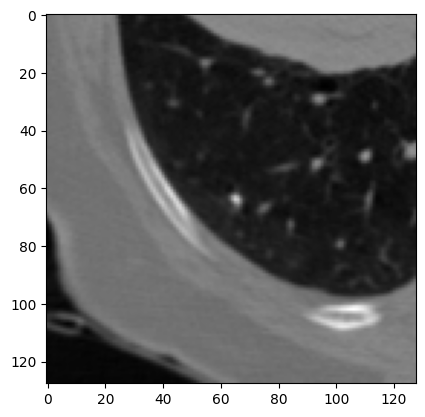

In [ ]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
Thres = 1000
input_dir="/content/drive/MyDrive/LungCancer/Datasets/LIDC-IDRI-slices/"
out_dir = "/content/drive/MyDrive/LungCancer/ModelRun"
plt.imshow(img)
plt.show()

In [ ]:
np.asarray(img).shape

(128, 128, 3)

In [ ]:
np.array(images).shape

(0,)

In [ ]:
np.array(masks).shape

(0,)

In [ ]:
images=[]

y=[]
for nodule in os.listdir('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)

/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-4.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-2.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-8.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-3.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-5.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-0.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-1.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-4.png
/kag

In [ ]:
i=7
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())


289935
0
102510
237915


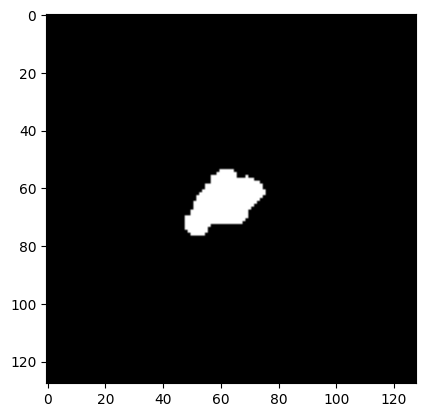

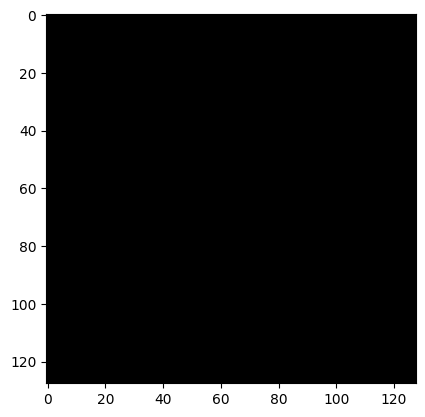

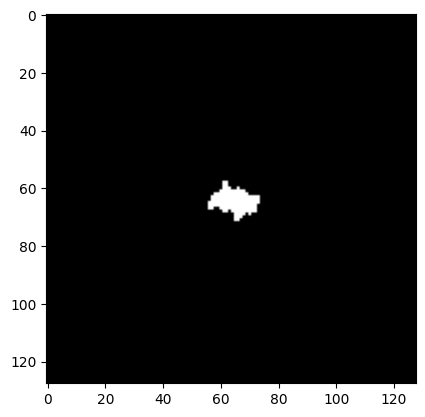

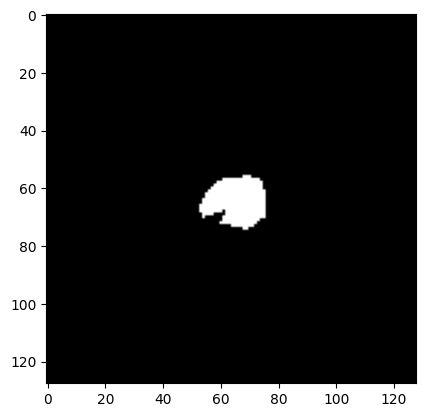

In [ ]:
plt.imshow(mask0[i])
plt.show()
plt.imshow(mask1[i])
plt.show()
plt.imshow(mask2[i])
plt.show()
plt.imshow(mask3[i])
plt.show()

In [ ]:
Thres = 100000

In [ ]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[648720 572985 561510 562275]
0
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[614295 563805 574515 596700]
3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]


# # **Run From Here**

In [ ]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="/kaggle/input/lidcidri/LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
Thres = 1000

In [ ]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])

In [ ]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [ ]:
print(images.shape)
print(masks.shape)
print(label.shape)

(15548, 128, 128, 3)
(15548, 128, 128, 3)
(15548,)


In [ ]:
yy=pd.DataFrame(label)
yy.value_counts()

0    7992
1    7556
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test,mask_train,mask_test = train_test_split(images,label,masks,train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

(12438, 128, 128, 3)
(12438,)


In [ ]:
x_train_added = np.vstack([x_train,x_test[:2000]])
y_train_added = np.concatenate((y_train,y_test[:2000]))

# **Skip from here for transfer learning**

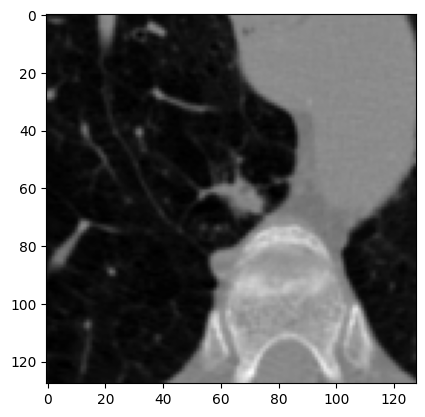

In [ ]:
plt.imshow(images[0])

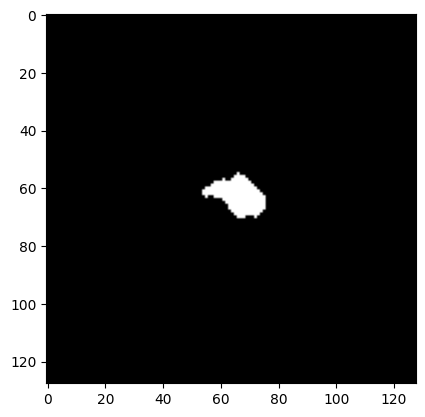

In [ ]:
plt.imshow(masks[0])

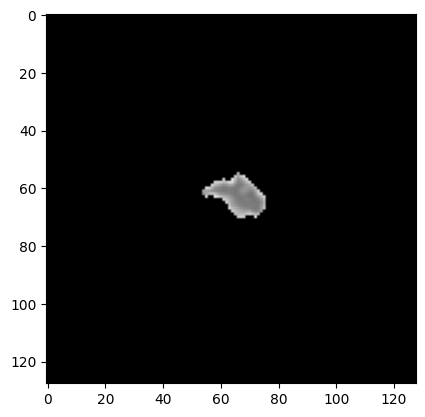

In [ ]:
plt.imshow(images[0]*masks[0])

In [ ]:
def block(inp,filters):
    x = Conv2D(filters, 1, activation="relu",padding='same',kernel_initializer='he_normal')(inp)
    x = BatchNormalization(axis=1)(x)
    x = Dropout(0.25)(x)

    y = Conv2D(filters,1,activation="relu", padding='same',kernel_initializer='he_normal')(inp)
    y = Conv2D(filters*2,3,activation="relu", padding='same')(y)
    y = Conv2D(filters,3,activation="relu", padding='same')(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)

    z = Conv2D(filters, 1, activation="relu", padding='same',kernel_initializer='he_normal')(inp)
    z = Conv2D(filters, 3, activation="relu", padding='same')(inp)
    z = BatchNormalization(axis=1)(z)

# outconv = Conv2D(filters, 1, activation="relu", padding='same',kernel_initializer='he_normal')([x,y,z,inp])
    outcon = layers.Concatenate()([x,y,z,inp])
    outconv = Conv2D(filters*2, 1, activation="relu", padding='same',kernel_initializer='he_normal')(outcon)
    output = MaxPooling2D(pool_size=(2,2))(outconv)
    return output



In [ ]:
Name = "CnnRegulized_BNLayer"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)

#x = layers.Conv2D(64, 3, activation="relu")(x)
y = block(x,32)
y = block(y,64)
y = block(y,128)
#y = layers.Conv2D(256, 3, activation="relu")(y)
# y = Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(x)
# y = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(y)
# y = MaxPooling2D((2,2))(y)
# y = BatchNormalization(axis=-1)(y)
# y = Dropout(0.25)(y)
# y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
# y = MaxPooling2D((2,2))(y)
# y = BatchNormalization(axis=-1)(y)
# y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(128, activation="LeakyReLU", kernel_regularizer=regularizers.l2(0.02))(y)
#y = BatchNormalization()(y)
y = Dropout(0.25)(y)
y = Dense(64, activation='LeakyReLU',kernel_regularizer=regularizers.l2(0.02))(y) #sigmoid activation
y = Dropout(0.25)(y)
outputs=Dense(1, activation='sigmoid')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

Model: "CnnRegulized_BNLayer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_44 (Conv2D)             (None, 126, 126, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_44[0][0]']              
                                                                               

## Name = "Seq3cnn"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)

#x = layers.Conv2D(64, 3, activation="relu")(x)
# y = block(x,64)
# y = block(y,128)
# y = block(y,256)
#y = layers.Conv2D(256, 3, activation="relu")(y)
y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(x)
y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D((2,2))(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D((2,2))(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(128, activation="LeakyReLU", kernel_regularizer=regularizers.l2(0.001))(y)
y = Dropout(0.25)(y)
y = Dense(32, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001))(y)
y = Dropout(0.25)(y)
outputs=Dense(1, activation='sigmoid')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, to_file='modelfinal.png', show_shapes=True)

Epoch 1/100


2023-08-25 05:56:23.726363: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inCnnRegulized_BNLayer/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


226/226 [==============================] - 30s 87ms/step - loss: 3.8594 - acc: 0.5211 - recall_3: 0.2721 - precision_3: 0.5125 - auc_3: 0.5256 - true_positives_3: 1907.0000 - true_negatives_3: 5616.0000 - false_negatives_3: 5101.0000 - false_positives_3: 1814.0000 - val_loss: 1.9235 - val_acc: 0.5254 - val_recall_3: 0.2739 - val_precision_3: 0.5131 - val_auc_3: 0.5213 - val_true_positives_3: 410.0000 - val_true_negatives_3: 1224.0000 - val_false_negatives_3: 1087.0000 - val_false_positives_3: 389.0000
Epoch 2/100
226/226 [==============================] - 19s 82ms/step - loss: 1.4831 - acc: 0.5447 - recall_3: 0.3617 - precision_3: 0.5469 - auc_3: 0.5554 - true_positives_3: 2535.0000 - true_negatives_3: 5330.0000 - false_negatives_3: 4473.0000 - false_positives_3: 2100.0000 - val_loss: 1.1887 - val_acc: 0.5492 - val_recall_3: 0.3066 - val_precision_3: 0.5577 - val_auc_3: 0.5659 - val_true_positives_3: 459.0000 - val_true_negatives_3: 1249.0000 - val_false_negatives_3: 1038.0000 - val_fa

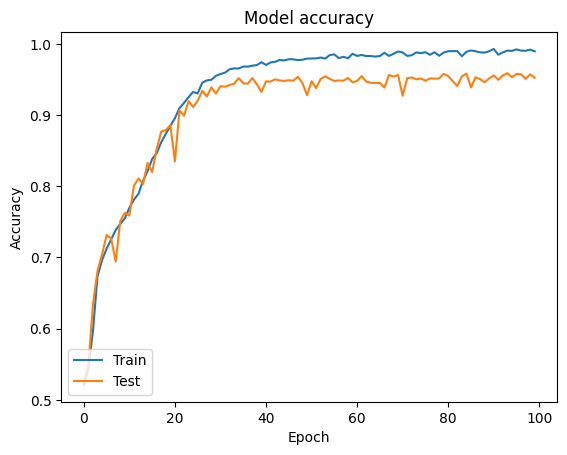

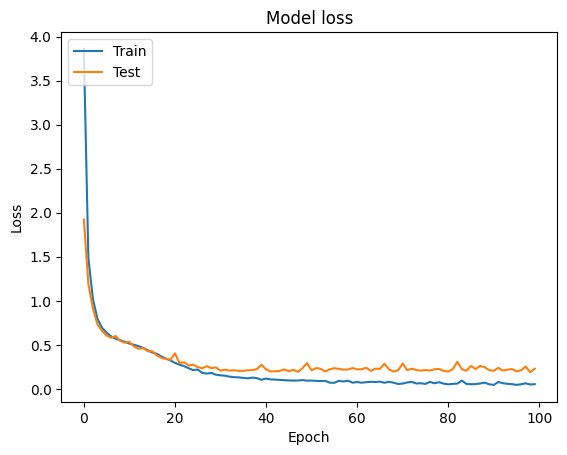

In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=100, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=100, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


# **BiLSTM- Attention**

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
class attention(Layer):

    """This class implents the attention mechanism layer: We will define a class named Attention as a derived class of the Layer class. We need to define four functions as per the Keras custom layer generation rule.
    These are build(),call (), compute_output_shape() and get_config()."""
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)


    """Inside build (), we will define our weights and biases, i.e., Wa and B .
    If the previous LSTM layer’s output shape is (None, 32, 100)
    then our output weight should be (100, 1) and bias should be (100, 1) dimensional."""
    def build(self,input_shape):
        self.w=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention,self).build(input_shape)


    """Inside call (), we will write the main logic of Attention. We simply must create a Multi-Layer Perceptron (MLP).
    Therefore, we will take the dot product of weights and inputs followed by the addition of bias terms.
    After that, we apply a ‘tanh’ followed by a softmax layer. This softmax gives the alignment scores.
    Its dimension will be the number of hidden states in the LSTM, i.e., 32 in this case.
    Taking its dot product along with the hidden states will provide the context vector:"""
    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.w)+self.b), axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])
    "The get_config() method collects the input shape and other information about the model."""
    def get_config(self):
        return super(attention,self).get_config()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Conv2D, Conv2DTranspose, Attention, Layer, Reshape

class VisualAttention(Layer):
    def __init__(self, channels_out, key_is_value=True):
        super(VisualAttention, self).__init__()

        self.channels_out = channels_out
        self.key_is_value = key_is_value

        self.flatten_images = None  # see build method
        self.unflatten_images = None  # see build method

        self.query_conv = Conv1D(filters=channels_out, kernel_size=1, padding='same')
        self.value_conv = Conv1D(filters=channels_out, kernel_size=4, padding='same')
        self.key_conv = self.value_conv if key_is_value else Conv1D(filters=channels_out, kernel_size=4, padding='same')

        self.attention_layer = Attention(use_scale=False, causal=False, dropout=0.)

    def build(self, input_shape):
        b, h, w, c = input_shape
        self.flatten_images = Reshape((h*w, c), input_shape=(h, w, c))
        self.unflatten_images = Reshape((h, w, self.channels_out), input_shape=(h*w, self.channels_out))

    def call(self, x, training=True):
        x = self.flatten_images(x)
        q = self.query_conv(x)
        v = self.value_conv(x)

        inputs = [q, v] if self.key_is_value else [q, v, self.key_conv(x)]
        output = self.attention_layer(inputs=inputs, training=training)
        return self.unflatten_images(output)


In [ ]:
model = VisualAttention(8)
y = model(x)
print(y.shape)

In [ ]:
Name = "CNNVisAttention"
inputs = tf.keras.Input(shape=img_shape, name="img")
#converted = tf.image.rgb_to_grayscale(inputs)
#reshaped_input = layers.Reshape((128,128))(converted)
x = layers.Conv2D(8, 3, activation="relu")(inputs)
#x = VisualAttention(8)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Conv2D(16,(3,3),activation='relu')(x)
x = VisualAttention(16)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Conv2D(32,(3,3),activation='relu')(x)
x = VisualAttention(32)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
y = Flatten()(x)
# x1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(reshaped_input)
# x1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(x1)
# atte_layer=attention()(x1)
#outputs=Dense(1,activation='sigmoid',trainable=True)(atte_layer)

# y = Dense(128, activation="LeakyReLU", kernel_regularizer=regularizers.l2(0.01))(x1)
# y = Dropout(0.25)(y)
y = Dense(64, activation='LeakyReLU',kernel_regularizer=regularizers.l2(0.01))(y)
y = Dropout(0.25)(y)
outputs=Dense(1, activation='sigmoid')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=10, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


In [ ]:
Name = "BilstmCNN"
inputs = tf.keras.Input(shape=img_shape, name="img")

reshaped_input = layers.Reshape((1,128,128,3))(inputs)
x1 = TimeDistributed(Conv2D(32,(3,3),activation='relu'))(reshaped_input)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = TimeDistributed(Conv2D(64,(3,3),activation='relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = TimeDistributed(Conv2D(64,(3,3),activation='relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = layers.Reshape((196,64))(x1)
x1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(x1)
x1 = Bidirectional(LSTM(64,dropout=0.3,recurrent_dropout=0.2))(x1)

outputs=Dense(1, activation='sigmoid')(x1)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())



In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=10, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


In [ ]:
Name = "CNNATLSTM"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)
y = block(x,32)
y = block(y,64)
y = block(y,128)
y = Flatten()(y)
y = Dense(128, activation="LeakyReLU", kernel_regularizer=regularizers.l2(0.01))(y)
y = Dropout(0.25)(y)

converted = tf.image.rgb_to_grayscale(inputs)
reshaped_input = layers.Reshape((128,128))(converted)
bl1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(reshaped_input)
bl2 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(bl1)
atte_layer=attention()(bl2)
merge = layers.Concatenate()([y,atte_layer])
y = Dense(64, activation='LeakyReLU',kernel_regularizer=regularizers.l2(0.01))(merge)
y = Dropout(0.25)(y)
outputs=Dense(1, activation='sigmoid')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, to_file='Cnnattentionlstm.png', show_shapes=True)

In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=10, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


# # **And From here**

In [ ]:
Name = "CNNATLSTM"

In [ ]:
x_train,x_test,y_train,y_test,mask_train,mask_test = train_test_split(images,label,masks,train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

In [ ]:
x_train_added = np.vstack([x_train,x_test[:2000]])


In [ ]:
x_train_added.shape

In [ ]:
y_train_added.shape

In [ ]:
y_train_added = np.concatenate((y_train,y_test[:2000]))

In [ ]:
x_test.shape

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.convnext import ConvNeXtSmall
from tensorflow.keras.applications.convnext import ConvNeXtLarge
from tensorflow.keras.applications.convnext import ConvNeXtBase

In [ ]:
"""
classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 100
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

# uncomment here
classifier = EfficientNetB7(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 500
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

# uncomment here

classifier = VGG19(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False
 """
classifier = ConvNeXtSmall(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 280
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
Name='ConvNextsmall'
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile (optimizer= keras.optimizers.Adam(),  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

checkpoint_filepath = 'checkpoint.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_freq=5000)

early_stopping = EarlyStopping(
    monitor='val_acc',
    patience=15,
    min_delta=0.001,
    mode='max',
    restore_best_weights=True
)


history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64,callbacks=[model_checkpoint_callback, early_stopping])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()



model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

In [ ]:
import cv2
from time import time
import os
import numpy as np
import json

import tensorflow as tf
from tensorflow import keras
from scipy.ndimage.interpolation import zoom
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras.backend as K
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt
#############################

def layer_finder(k_model, model_arch, pool_input=True):

  '''
  Returns a list of all of the last layers in each block of the model.

    Parameters:
      k_model (Keras model): Either a VGG or ResNet
      model_arch (str): Either "VGG" or "ResNet"

    Returns:
      last_layers (list): A list of all of the last layers in each block of the
      model.
  '''

  if type(model_arch) != str:
    raise TypeError("Input argument \"model_arch\" must be a string that is\
                      either \"VGG\" or \"ResNet\".")

  last_layers = []
  pool_flag=False
  block_end_detected=False
  first_layer=True
  j=0

  if model_arch == "VGG":

    for layer in k_model.layers:
      if type(layer) == tf.keras.layers.MaxPool2D:
        last_layers.append(layer.name)

  elif model_arch == "ResNet":


    for i in range(len(k_model.layers)):
      if i<j: continue
      #print(k_model.layers[i])
      if len(k_model.layers[i+1].output.get_shape()) < 4:
        # only save a layer if the block before the end was a convolutional block
            last_layers.append(k_model.layers[i].name)
            break

      if k_model.layers[i+1].output.get_shape()[2]<k_model.layers[i].output.get_shape()[2]-4:
          if pool_input==True:
              if type(k_model.layers[i]) == tf.keras.layers.InputLayer: continue
              if 'ZeroPadding2D' in str(type(k_model.layers[i])):
                  if type(k_model.layers[i-1]) == tf.keras.layers.InputLayer: continue
                  last_layers.append(k_model.layers[i-1].name)
              else:
                  last_layers.append(k_model.layers[i].name)
          else:
              if first_layer:
                  j=i+1
                  pool_flag=True
                  while(pool_flag):
                      j += 1
                      #print(str(type(k_model.layers[j])))
                      if  'Conv2D' in str(type(k_model.layers[j])):
                          #print('Here')
                          last_layers.append(k_model.layers[j-1].name)
                          first_layer=False
                          pool_flag=False
              else:
                  j=i
                  pool_flag=True
                  while(pool_flag):
                      j += 1
                      #print(str(type(k_model.layers[j])))
                      if 'merge.Add' in str(type(k_model.layers[j])):
                          block_end_detected=True
                          #print(j)
                      elif block_end_detected==True and 'Conv2D' in str(type(k_model.layers[j])):
                          #print('Here')
                          last_layers.append(k_model.layers[j-1].name)
                          block_end_detected=False
                          pool_flag=False
  else:

    print("Input argument \"model_arch\" must be either \"VGG\" or \"ResNet\".")

  return [[lay] for lay in last_layers]

def create_random_mask(h=7, w=7, H=224, W=224, p_1=0.5, resample=Image.BILINEAR):
    '''
    Generates one random mask utilized in RISE
    inputs:
        h, w: initial size of binary mask
        H, W: final size of the upsampled mask
        p_1: probability of actiating pixels in the down-sampled masks.
        interp: upsampling technique.
    returns:
        mask: a smooth mask with the values in range [0,1] with size of HxW.
    '''
    assert H>h, 'Masks should be resized to higher dimensions.'
    assert W>w, 'Masks should be resized to higher dimensions.'
    # create random binary hxw mask
    mask=np.random.choice([0, 1], size=(h, w), p=[1-p_1, p_1])

    # upsample mask to (h+H,w+W)
    mask = Image.fromarray(mask*255.)
    mask = mask.resize((H + h, W + w), resample=resample)
    mask = np.array(mask)

    # randomly crop mask to HxW
    w_crop = np.random.randint(0,w+1)
    h_crop = np.random.randint(0,h+1)
    mask = mask[h_crop:H + h_crop, w_crop:W + w_crop]

    # normalize between 0 and 1
    mask /= np.max(mask)

    return mask

def create_attribution_masks(img, model, layers, class_index, max_mask_num, interp='bilinear'):
    '''
    Derives feature maps from one, or a couple of layers, and post-processes them
    to convert them to attribution masks.

    inputs:
        img: a 4-D tensor image.
        model: the classification model
        layers: list of layers to be visualized either individually or mutually.
        class_index: the output class according to whom the layer(s) are visualized.
        max_mask_num: the threshold "normalized gradient" value for sampling attribution masks (\mu in our paper)
        interp: upsampling technique.
        For now, 'bilinear' and 'nearest' are supported.
    returns:
        masks: a set of attribution masks normalized between 0 and 1.
    '''
    assert interp in ['bilinear', 'nearest'], 'Selected upsampling type undefined or unsupported.'
    # Forward pass to get attribution masks.
    conv_outputs=[]
    for layer in model.layers:
        if np.isin(layer.name,layers):
            conv_outputs.append(layer.output)
    conv_outputs.append(model.output)
    feedforward1=keras.models.Model([model.input], [conv_outputs])
    with tf.GradientTape() as tape:
        ff_results=feedforward1([img])[0]
        all_fmap_masks, predictions = ff_results[:-1], ff_results[-1]
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, all_fmap_masks)
    ###

    # upsample and normalize masks.
    num_masks=0
    masks=[]
    for i in range(len(layers)):
        tmp_mask = all_fmap_masks[i][0].numpy()
        if len(img.shape)==3:
            axis=0
            size=img.shape[1:]
            tmp_mask = np.expand_dims(tmp_mask, axis=1)
        elif len(img.shape)==4:
            axis=(0,1)
            size=img.shape[1:-1]
        significance = np.mean(grads[i][0], axis=axis)
        #idxs = np.argpartition(significance, -1*max_mask_num)[-1*max_mask_num:]
        idxs = np.where(significance>max_mask_num*np.max(significance))[0]
        if interp == 'bilinear':
            fmap = tf.image.resize(tmp_mask[...,idxs], size, method='bilinear').numpy()
        elif interp == 'nearest':
            fmap = tf.image.resize(tmp_mask[...,idxs], size, method='nearest').numpy()
        else: raise ValueError('You have selected an unsupported interpolation type.')

        num_masks+=fmap.shape[2]
        fmap -= np.min(fmap, axis=(0,1))
        fmap /= (np.max(fmap, axis=(0,1))+10e-7)
        masks.append(fmap)
    return masks

def visualize_layers(img, model, class_index, masks, H=224, W=224, C=3, batch_size = 128):
    '''
    Combines attribution masks using the RISE-based framework mentioned in
    SISE white paper.
    inputs:
        img: a 3-D tensor image.
        model: the classification model
        class_index: the output class according to whom the layer(s) are visualized.
        masks: a set of attribution masks normalized between 0 and 1.
    returns:
        sum_masks: visualization map of the selected layer(s).
    This function follows 'create_attribution_masks()'.
    '''
    # creates perturbed images to probe model.
    img = img if len(img.shape)==3 else np.expand_dims(img, axis=1)
    X = np.einsum('hwc,hwn->nhwc', img, masks)
    # second forward pass to valuate attribution maps
    preds_masked = np.empty([0])
    if masks.shape[2] <= batch_size :
      preds_masked=np.append(preds_masked, model(X, training=False)[:,class_index],axis=0)
    else :
      for i in range (0, masks.shape[2]-batch_size, batch_size) :
        preds_masked=np.append(preds_masked, model(X[i:i+batch_size], training=False)[:,class_index],axis=0)
      preds_masked=np.append(preds_masked, model(X[i+batch_size:], training=False)[:,class_index],axis=0)

    # Linear combination of attribution masks.
    masks /= (masks.sum(axis=(0,1))+10e-7)
    sum_mask = np.einsum('hwn,n->hw', masks, preds_masked)

    sum_mask -= np.min(sum_mask)
    sum_mask /= np.max(sum_mask)
    return sum_mask

def otsu(I, nbins=256, tau=1.5):
    '''
    Finds the optimum adaptive threshold value for a 2-D image.
    inputs:
        I: a 2-D image (visualization map/ heat-map/ etc.)
        nbins: resolution of histogram. Increasing this parameter yields to more
        precise threshold value, achieved in longer time.
        tau: bottleneck amplititude
        returns: Otsu adaptive threshold value
    '''
    I = np.round(I*nbins)
    #histogram of the image
    hist, bins = np.histogram(I.ravel(),nbins,[0,nbins])
    #CDF/ mean/ variance terms for multiple values
    i = np.arange(nbins)
    varsb = np.zeros(nbins)
    for j in range(1, nbins):
        w0 = np.sum(hist[0:j])
        w1 = np.sum(hist[j:nbins])
        u0 = np.sum(np.multiply(hist[0:j], i[0:j])) / w0
        u1 = np.sum(np.multiply(hist[j:nbins], i[j:nbins])) / w1
        varsb[j] = w0 * w1 * (u0-u1) * (u0-u1)
    # the threshold value is the one maximizing the variance term.
    t = np.argmax(varsb)
    #print(t)
    k = round(t*tau)
    if np.sum(hist[int(k):256]) < .1 * np.sum(hist):
        #print('happened')
        return t*tau/nbins
    else:
        return t/nbins

def otsu_sigmoid(I, nbins=256, T=100., tau=1.5):
    '''
        Thresholds the 2-D visualization map softly, combining Otsu's method and
        sigmoid function.
        inputs:
            I: a 2-D image (visualization map/ heat-map/ etc.)
            nbins: resolution of histogram. Increasing this parameter yields to more
            precise threshold value, achieved in longer time.
            T: sigmoid temparature (preferred to be set to high values.)
        returns:
            the soft-thresholded heat-map according to the input.
    '''
    thr=otsu(I, nbins=256, tau=1.5)
    return 1/(1 + np.exp(-(I-thr)*T))

def fuse_visualization_maps(exmaps, fusion_type='otsu', T=100.):
    '''
    Fuses visualization maps to a unique explanation map. Visualization maps should
    be given with the correct order (low-level layer to high-level layer)

    '''
    assert fusion_type in ['simple', 'otsu']
    ex=exmaps[0]
    if fusion_type=='simple':
        for i in range(1, len(exmaps)):
            ex += exmaps[i]
            ex *= exmaps[i]
    elif fusion_type=='otsu':
        for i in range(1, len(exmaps)):
            ex += exmaps[i]
            ex *= otsu_sigmoid(exmaps[i], T=T)
    return ex

def SISE(img, model, class_index, layers, grad_thr, interp='bilinear',
         fusion_type='otsu', T=100.):

    '''
    For now, this function supports VGG16, ResNet50, and ResNet101.
    img: a 4-D image, or a 3-D array.
    model: the classification model
    layers: list of layers to be visualized either individually or mutually.
    interp: upsampling technique.
    Check the supproted upsampling types in function 'create_attribution_masks'.
	grad_thr: Threshold on the average gradient values to select the most appropriate feature maps.
    fusion_type: the fusion technipue for visualization maps:
        simple: Using only addition and multiplication blocks.
        otsu: Using addition, soft otsu threshold, and multiplication blocks.
    auto_layer_finder: if 'True', the layers are automatically selected. Otherwise,
        pre-defined layers for the models experimented are used.
    pool_input_select: If True, the inputs of pooling layers are detected automatically.
        Otherwise,  the outputs of pooling layers are detected automatically.
        If 'auto_layer_finder=False', this parameter is ineffective.
    '''
    masks = create_attribution_masks(img, model, layers, class_index=class_index, max_mask_num = grad_thr, interp=interp)
    exmaps=[]
    for mask_set in masks:
        exmaps.append(visualize_layers(img[0], model, class_index, mask_set))
    return fuse_visualization_maps(exmaps, fusion_type=fusion_type, T=T)


def weighted_fusion(w,exmaps, T=100.):
    '''
    Objective: weighted fusion using weighted addition, unweighted multiplication, and otsu threshold blocks.
    inputs:
        w: an array of weight factors of length N-1.
        exmaps: a 3-D array of explanation maps of length H x W x N.
    parameters:
        N: number of visualiation maps received
        H x W: size of visualization maps.
    outputs:
        e_out: fused explanation map.
    '''
    #w_post=np.maximum(w,0)
    w_post=np.clip(a=w, a_min=0, a_max=2)
    e23=np.multiply((exmaps[:,:,0]*w_post[0]+exmaps[:,:,1]*(2-w_post[0])),
                    otsu_sigmoid(exmaps[:,:,1], T=T))
    e234=np.multiply((e23*w_post[1]+exmaps[:,:,2]*(2-w_post[1])),
                    otsu_sigmoid(exmaps[:,:,2], T=T))
    e2345=np.multiply((e234*w_post[2]+exmaps[:,:,3]*(2-w_post[2])),
                    otsu_sigmoid(exmaps[:,:,3], T=T))
    e23456=np.multiply((e2345*w_post[3]+exmaps[:,:,4]*(2-w_post[3])),
                    otsu_sigmoid(exmaps[:,:,4], T=T))
    e_out = e23456
    return e_out

def grad_cam(input_model, image, layer_name):
    cls = np.argmax(input_model.predict(image))
    def normalize(x):
        """Utility function to normalize a tensor by its L2 norm"""
        return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output
    conv_output = input_model.get_layer(layer_name).output
    feedforward1 = keras.models.Model([input_model.input], [conv_output, y_c])
    with tf.GradientTape() as tape:
        ff_results=feedforward1([image])
        all_fmap_masks, predictions = ff_results[0], ff_results[-1]
        loss = predictions[:, cls]
    grads_val = tape.gradient(loss, all_fmap_masks)
    if len(image.shape)==3:
        axis=(0, 1)
    elif len(image.shape)==4:
        axis=(0, 1, 2)
    weights = np.mean(grads_val, axis=axis)
    cam = np.dot(all_fmap_masks[0], weights)
    #print (cam)
    H,W= image.shape[1:3]
    cam = np.maximum(cam, 0)
    #cam = resize(cam, (H, W))
    cam = zoom(cam,H/cam.shape[0])
    #cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

def RISE(img, model, class_index, N_MASKS=8000, H=224, W=224, C=3):
    '''
	img: a 3-D input image
	model: a trained model
	class_index; The class of interest
	N_MASKS: The number of random masks to be generated
	H,W,C: The desired dimensions of the random masks
	'''
    X = np.zeros(shape=(N_MASKS, H, W, C), dtype=np.float32)
    masks = np.zeros((N_MASKS,H,W), dtype=np.float32)
    #for i in tqdm(range(N_MASKS)):
    for i in range(N_MASKS):
        m =create_random_mask(H=H, W=W)
        masks[i] = m
        x = img.copy()
        x[:, :, 0] *= m
        x[:, :, 1] *= m
        x[:, :, 2] *= m
        X[i] = x
    preds_masked = model.predict(X, verbose=0)
    sum_mask = np.zeros(masks[0].shape, dtype=np.float32)
    #print(preds_masked)
    # np.einsum???
    for i, mask in enumerate(masks):
        m = mask * preds_masked[i, class_index]
        sum_mask += m

    sum_mask -= np.min(sum_mask)
    sum_mask /= np.max(sum_mask)
    return sum_mask

In [ ]:
pip install tf-explain

In [ ]:
from tf_explain.core.integrated_gradients import IntegratedGradients

explainerIG = IntegratedGradients()

In [ ]:
def dispheatmaps(model,image,label,mask_img):
    img = image.squeeze()
    mask = mask_img.squeeze()
    explanation_map_GradCAM = grad_cam(model, np.expand_dims(image, axis=0), 'conv2d_211')
    explanation_map_GradCAM -= explanation_map_GradCAM.min()
    explanation_map_GradCAM /= explanation_map_GradCAM.max()+10e-30

    explanation_map_IntGrad = explainerIG.explain((np.array([image]), None), model, label).astype('float32')
    explanation_map_IntGrad -= explanation_map_IntGrad.min()
    explanation_map_IntGrad /= explanation_map_IntGrad.max()+10e-30

    nn = 4
    fig = plt.figure(figsize=(10,10))
    a = fig.add_subplot(1, nn, 1)
    plt.imshow(img)
    a.set_title("original",fontsize=10)
    plt.axis('off')


    a = fig.add_subplot(1, nn, 2)
    plt.imshow(explanation_map_GradCAM,cmap='plasma', interpolation='nearest')
    a.set_title("gradCAM",fontsize=10)
    plt.axis('off')

    a = fig.add_subplot(1, nn, 3)
    plt.imshow(explanation_map_IntGrad,cmap='plasma', interpolation='nearest')
    a.set_title("IntGrad",fontsize=10)
    plt.axis('off')

    a = fig.add_subplot(1, nn, 4)
    plt.imshow(mask)
    a.set_title("Segmentation",fontsize=10)
    plt.axis('off')
    plt.show()


In [ ]:
index = 1104
#x_test,y_test
prediction=model.predict(x_test)
print('True label: '+ str(y_test[index]))
print('Predicted_label: '+ str(prediction[index]))
print('Confidence score for the correct label: '+str(prediction[index][np.argmax(y_test[index])]))
dispheatmaps(model,x_test[index],np.argmax(prediction[index]),mask_test[index])

In [ ]:
plt.imshow(mask_test[1104])

In [ ]:
y_test[4]

In [ ]:
for i in range (y_test.shape[0]):
    if y_test[i]:
        print(i)

In [ ]:

newdata = RISE(x_test2[index], model, y_test[index], N_MASKS=800, H=128, W=128, C=3)

In [ ]:
x_test2 = x_test.astype('float32')

In [ ]:
plt.imshow(newdata)

In [ ]:
import shap
test_images = x_test[500:510]
e = shap.DeepExplainer(model, x_test)


In [ ]:
shap_values = e.shap_values(test_images)
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

shap.image_plot(shap_numpy, -test_numpy)